# Bayesian Priors
The purpose of this function is to provide an intuition behind several different prior probability distributions and 
how the posterior distributions are impacted.

For this example, we can consider the data coming from a series of coin flips. Before I began flipping the coin, I 
generated four prior probability distributions. Afterwards, I collected data on this coin by flipping it a pre-specified
number of times. Of the ``100`` coin flips, ``46`` returned heads. Now that we have this data, we can see how the 
posterior is influenced by our priors.

In [33]:
%matplotlib inline
import math
import matplotlib.pyplot as plt

n = 100  # Number of trials
y = 46  # Number of successes

## Uniform
The uniform prior provides equal weight (likelihood) to each potential probability. Basically, we are saying all 
potential outcomes were equally likely. I am quite uncertain regarding the fairness of this coin. As you will see, the
posterior is largely impacted by the data.

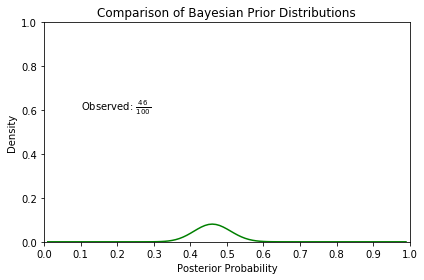

In [34]:
# Setting up potential values and prior distribution
pvalues1 = [i / 100 for i in range(1, 100)]
priors = [1 / 99 for r in range(len(pvalues1))]

# Setting up tools to calculate
summation = 0
likelihood = []
prior_likelihood = []

# Looping through potential probabilities and priors
for theta, prior in zip(pvalues1, priors):
    lklhd = math.factorial(n) / math.factorial(y) / math.factorial(n - y) * (theta**y) * ((1-theta)**(n-y))
    likelihood.append(lklhd)

    plklhd = prior*lklhd
    summation += plklhd
    prior_likelihood.append(plklhd)


# Calculating posterior probabilities
posterior_likelihood1 = [i/summation for i in prior_likelihood]

# Plotting
plt.plot(pvalues1, posterior_likelihood1, color='g', label='Uniform Prior')
plt.text(0.1, 0.6, r'Observed: $\frac{'+str(y)+r'}{'+str(n)+r'}$')
plt.xlim([0, 1])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylim([0, 1])
plt.title('Comparison of Bayesian Prior Distributions')
plt.ylabel('Density')
plt.xlabel('Posterior Probability')
plt.tight_layout()
plt.show()

## Spike-Slab
A single point is given a set probability less than 1. The remainder is split evenly amongst all other values. The 
singular point is the "spike" and the "slab" is the leftover uniform distribution. For the purposes of this, I believe 
that the coin was fair, so I placed a spike at ``0.50`` with a probability of `0.1`. 

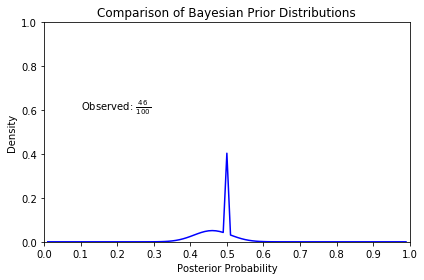

In [35]:
# Setting up potential values and prior distribution
pvalues2 = [i / 100 for i in range(1, 100)]
spike = 0.10
priors = [(1-spike)/98 if i != 0.50 else spike for i in pvalues2]

# Setting up tools to calculate
summation = 0
likelihood = []
prior_likelihood = []

# Looping through potential probabilities and priors
for theta, prior in zip(pvalues2, priors):
    lklhd = math.factorial(n) / math.factorial(y) / math.factorial(n - y) * (theta**y) * ((1-theta)**(n-y))
    likelihood.append(lklhd)

    plklhd = prior*lklhd
    summation += plklhd
    prior_likelihood.append(plklhd)


# Calculating posterior probabilities
posterior_likelihood2 = [i/summation for i in prior_likelihood]

# Plotting
plt.plot(pvalues2, posterior_likelihood2, color='b', label='Spike-Slab Prior')
plt.text(0.1, 0.6, r'Observed: $\frac{'+str(y)+r'}{'+str(n)+r'}$')
plt.xlim([0, 1])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylim([0, 1])
plt.title('Comparison of Bayesian Prior Distributions')
plt.ylabel('Density')
plt.xlabel('Posterior Probability')
plt.tight_layout()
plt.show()

## Dogmatic
A dogmatic prior assumes you know reality and no amount of evidence could convince you otherwise. The dogmatic I 
asserted that all coins are unfair, therefore the coin flipped must be heads 75% of the time. In this scenario, the 
entire prior if focused on that singular point (`0.75`). As you will see, no evidence or observation can influence the 
posterior, when you make a dogmatic claim. See Cole, S. R., Chu, H., Brookhart, M. A., & Edwards, J. K. (2017). 
Dogmatists cannot learn. Epidemiology (Cambridge, Mass.), 28(2), e10. for a more in-depth description of this

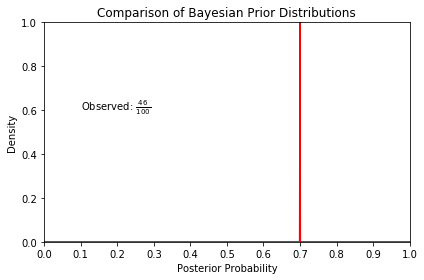

In [36]:
# Setting up potential values and prior distribution
pvalues3 = [i / 1000 for i in range(1, 1000)]
spike = 1
priors = [(1-spike)/98 if i != 0.70 else spike for i in pvalues3]

# Setting up tools to calculate
summation = 0
likelihood = []
prior_likelihood = []

# Looping through potential probabilities and priors
for theta, prior in zip(pvalues3, priors):
    lklhd = math.factorial(n) / math.factorial(y) / math.factorial(n - y) * (theta**y) * ((1-theta)**(n-y))
    likelihood.append(lklhd)
    plklhd = prior*lklhd
    summation += plklhd
    prior_likelihood.append(plklhd)


# Calculating posterior probabilities
posterior_likelihood3 = [i/summation for i in prior_likelihood]

# Final Plot Function
plt.plot(pvalues3, posterior_likelihood3, color='r', label='Dogmatic Prior')
plt.text(0.1, 0.6, r'Observed: $\frac{'+str(y)+r'}{'+str(n)+r'}$')
plt.xlim([0, 1])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylim([0, 1])
plt.title('Comparison of Bayesian Prior Distributions')
plt.ylabel('Density')
plt.xlabel('Posterior Probability')
plt.tight_layout()
plt.show()

## Approximate Beta
I don't know this well enough to provide a description yet. This will be updated once I have a better intuition

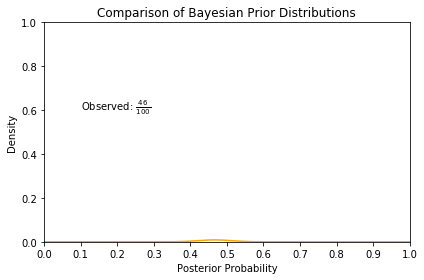

In [37]:
# Setting up potential values and prior distribution
pvalues4 = [i / 1000 for i in range(1, 1000)]
a = 10
b = 10
priors = [((math.gamma(a+b)/(math.gamma(a)*math.gamma(b)))*(i**(a-1))*((1-i)**(b-1)))/100 for i in pvalues4]

# Setting up tools to calculate
summation = 0
likelihood = []
prior_likelihood = []

# Looping through potential probabilities and priors
for theta, prior in zip(pvalues4, priors):
    lklhd = math.factorial(n) / math.factorial(y) / math.factorial(n - y) * (theta**y) * ((1-theta)**(n-y))
    likelihood.append(lklhd)
    plklhd = prior*lklhd
    summation += plklhd
    prior_likelihood.append(plklhd)


# Calculating posterior probabilities
posterior_likelihood4 = [i/summation for i in prior_likelihood]

# Final Plot Function
plt.plot(pvalues4, posterior_likelihood4, color='orange', label=r'Approx $\beta(a,b)$ Prior')
plt.text(0.1, 0.6, r'Observed: $\frac{'+str(y)+r'}{'+str(n)+r'}$')
plt.xlim([0, 1])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylim([0, 1])
plt.title('Comparison of Bayesian Prior Distributions')
plt.ylabel('Density')
plt.xlabel('Posterior Probability')
plt.tight_layout()
plt.show()

## Plot comparing all prior distributions

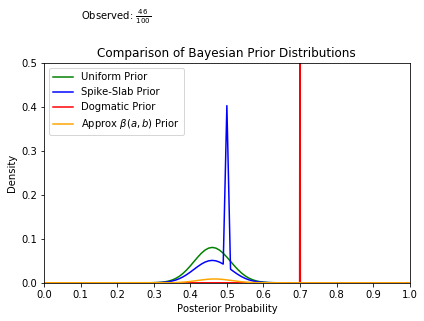

In [38]:
plt.plot(pvalues1, posterior_likelihood1, color='g', label='Uniform Prior')
plt.plot(pvalues2, posterior_likelihood2, color='b', label='Spike-Slab Prior')
plt.plot(pvalues3, posterior_likelihood3, color='r', label='Dogmatic Prior')
plt.plot(pvalues4, posterior_likelihood4, color='orange', label=r'Approx $\beta(a,b)$ Prior')
plt.text(0.1, 0.6, r'Observed: $\frac{'+str(y)+r'}{'+str(n)+r'}$')
plt.xlim([0, 1])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.ylim([0, 0.5])
plt.title('Comparison of Bayesian Prior Distributions')
plt.ylabel('Density')
plt.xlabel('Posterior Probability')
plt.legend()
plt.tight_layout()
plt.show()